In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [4]:
#General parameters
years = 16
dt = 15
time = int(261 * years)

#Simulation parameters
yearly_return = 1.07

daily_return = 1.001
daily_loss = 1 - 0.01

gain_phase = 0.7
loss_phase = 1 - gain_phase

mode = "fixed_gain_phase"
#mode = "fixed_return"
 

#Tade parameters
trades = 12 * years
max_trades = 20 * years
hold_time = 20
time_after_reversel = 0
smooth_period = 20

trade_coast = 1
spread = 0.002
tax_rate = 0.025
tax_allowance = 1000

initial_investment = 5000
saving_plan_period = 22
saving_plan = {12*i: 500 * 1.02**(i*12) for i in range(0,years)}


sim = ChartSimulation(yearly_return=yearly_return, daily_return=daily_return, daily_loss=daily_loss, gain_phase=gain_phase, loss_phase=loss_phase, mode=mode, 
                      initial_investment=initial_investment, saving_plan=saving_plan, saving_plan_period=saving_plan_period,  dt=dt, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, trade_coast=trade_coast, spread=spread, tax_rate=tax_rate, tax_allowance=tax_allowance
                      )

performance, phase = sim.simulate_performance()

buy_and_hold_performance = sim.buy_and_hold()[0]
random_swing_performance_analyse = sim.random_swing_trade()[0]
swing_performance_analyse = sim.swing_trade()[0]

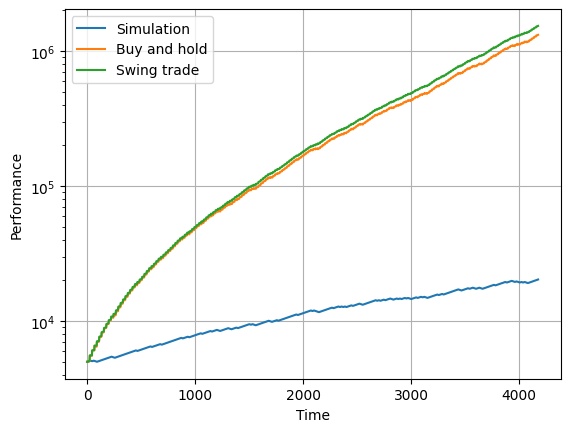

Initial invetment:  5000
Total Investment:  931627.9436288902

Index performance:
    Absolute: 20338.434, Relative: 4.068
    Yearly performance: 1.092

Buy and hold return:
    Absolute: 1317648.423, Relative: 1.414
    Yearly performance: 1.022, Internal rate of return: 1.08
    Taxes: 0, Transaction cost: 1898.575

Swing trade return:
    Absolute: 1533980.373, Relative: 1.647
    Yearly performance: 1.032, Internal rate of return: 1.111
    Taxes: 13437.856, Transaction cost: 42548.792

Random swing trade return:
    Absolute: 981003.607, Relative: 1.053
    Yearly performance: 1.003, Internal rate of return: 1.013
    Taxes: 2767.821, Transaction cost: 88517.338

Best return:  39035.526


In [5]:
plt.plot(performance, label="Simulation")
plt.plot(buy_and_hold_performance, label="Buy and hold")
plt.plot(swing_performance_analyse, label="Swing trade")
#plt.plot(random_swing_performance_analyse, label="Random swing trade")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

plt.yscale("log")

plt.show()


#sim.print_parameters()
sim.print_results(accuracy=3)
#sim.plot_performance()

In [6]:
mc = MonteCarloSimulation(chartsim=sim, parallel=True)
_ = mc.mc_artificial_chart(n=500)

# mc.hist_performance(bins=30)

100%|██████████| 500/500 [01:55<00:00,  4.34it/s]


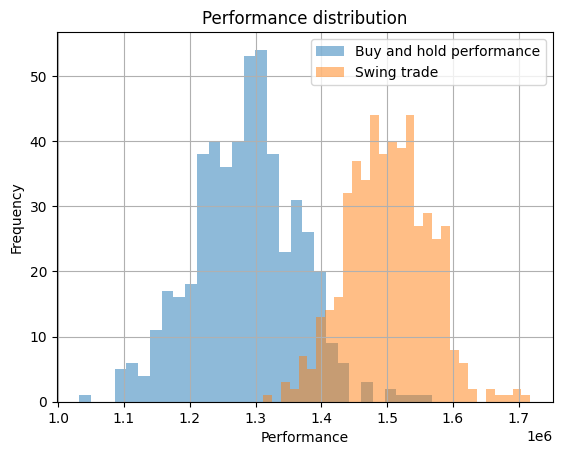

Initial invetment:  5000
Total money invested:  931627.9436288902

Index performance:
  Overall return: 15097.504 +/- 2291.435 (Median: 14853.017)
  Relative performance: 3.02 +/- 0.458 (Median: 2.971)
  Yearly performance: 1.071 +/- 0.01 (Median: 1.07)

Buy and hold return:
  Overall return: 1285285.399 +/- 78247.431 (Median: 1286935.567)
  Relative performance: 1.38 +/- 0.084 (Median: 1.381)
  Yearly performance: 1.02 +/- 0.004 (Median: 1.02)
  Internal rate of return: 1.074 +/- 0.013 (Median: 1.075)
  Taxes: 0.0 +/- 0.0 (Median: 0.0)
  Transaction cost: 1898.575 +/- 0.0 (Median: 1898.575)

Swing trade return:
  Overall return: 1502369.913 +/- 62271.278 (Median: 1501897.508)
  Relative performance: 1.613 +/- 0.067 (Median: 1.612)
  Yearly performance: 1.03 +/- 0.003 (Median: 1.03)
  Internal rate of return: 1.107 +/- 0.008 (Median: 1.107)
  Taxes: 13993.656 +/- 1527.978 (Median: 13990.654)
  Transaction cost: 42039.793 +/- 4157.031 (Median: 42134.044)

Random swing trade return:
  Ov

In [7]:


bins=30
limits=None

#plt.hist(mc.index_performance, bins=bins, range=limits, alpha=0.5, label="Index Performance")
plt.hist(mc.buy_and_hold_profit, bins=bins, range=limits, alpha=0.5, label="Buy and hold performance")
plt.hist(mc.swing_profit, bins=bins, range=limits, alpha=0.5, label="Swing trade")
#plt.hist(mc.random_swing_profit, bins=bins, range=limits, alpha=0.5, label="Random swing trade")

plt.xlabel("Performance")
plt.ylabel("Frequency")
plt.title("Performance distribution")

plt.grid()
plt.legend()
plt.show()

mc.print_results(accuracy=3)